In [1]:
import pandas as pd
import seaborn as sns

Read the dataset

In [2]:
btc = pd.read_csv('data/BTC.csv')
ada = pd.read_csv('data/ADA.csv')
eth = pd.read_csv('data/ETH.csv')
ltu = pd.read_csv('data/LTU.csv')
neo = pd.read_csv('data/NEO.csv')
xlm = pd.read_csv('data/XLM.csv')
xrp = pd.read_csv('data/XRP.csv')

In [3]:
btc

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.619570e+12,28-04-2021 00:00,BTC/USDT,55011.97,55225.68,54967.38,55090.61,593.519514,3.272135e+07,9487.0
1,1.619480e+12,27-04-2021 00:00,BTC/USDT,54001.38,55460.00,53222.00,55011.97,54064.034680,2.949719e+09,1568666.0
2,1.619400e+12,26-04-2021 00:00,BTC/USDT,49066.76,54356.62,48753.44,54001.39,86310.802120,4.555689e+09,2174544.0
3,1.619310e+12,25-04-2021 00:00,BTC/USDT,50047.84,50567.91,46930.00,49066.77,58255.645000,2.867858e+09,1475479.0
4,1.619220e+12,24-04-2021 00:00,BTC/USDT,51110.56,51166.22,48657.14,50047.84,55361.512570,2.762081e+09,1164985.0
...,...,...,...,...,...,...,...,...,...,...
1347,1.503274e+09,21-08-2017,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.120000,2.770592e+06,NaN
1348,1.503187e+09,20-08-2017,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.540000,1.915636e+06,NaN
1349,1.503101e+09,19-08-2017,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.150000,1.508239e+06,NaN
1350,1.503014e+09,18-08-2017,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.070000,4.994494e+06,NaN


## Preprocessing
    Extract the data of the required year (ie. 2020)

In [4]:
ada = ada.iloc[118:484]
btc = btc.iloc[118:484]
eth = eth.iloc[118:484]
ltu = ltu.iloc[118:484]
neo = neo.iloc[118:484]
xlm = xlm.iloc[118:484]
xrp = xrp.iloc[118:484]

In [5]:
ada

,unix,date,symbol,open,high,low,close,Volume ADA,Volume USDT,tradecount
118,1.609370e+12,31-12-2020 00:00,ADA/USDT,0.18389,0.18640,0.17443,0.18134,4.476726e+08,8.070917e+07,171189
119,1.609290e+12,30-12-2020 00:00,ADA/USDT,0.19069,0.19389,0.17511,0.18389,6.702210e+08,1.223884e+08,281329
120,1.609200e+12,29-12-2020 00:00,ADA/USDT,0.17630,0.19725,0.17304,0.19067,1.475501e+09,2.739704e+08,483117
121,1.609110e+12,28-12-2020 00:00,ADA/USDT,0.15467,0.18057,0.15280,0.17627,8.815477e+08,1.477541e+08,278089
122,1.609030e+12,27-12-2020 00:00,ADA/USDT,0.15839,0.16642,0.14936,0.15467,7.981346e+08,1.265128e+08,241054
...,...,...,...,...,...,...,...,...,...,...
479,1.578180e+12,05-01-2020 00:00,ADA/USDT,0.03436,0.03527,0.03419,0.03460,7.181528e+07,2.493890e+06,10424
480,1.578100e+12,04-01-2020 00:00,ADA/USDT,0.03417,0.03450,0.03375,0.03434,5.552875e+07,1.892276e+06,7992
481,1.578010e+12,03-01-2020 00:00,ADA/USDT,0.03269,0.03446,0.03236,0.03417,1.025810e+08,3.470143e+06,15068
482,1.577920e+12,02-01-2020 00:00,ADA/USDT,0.03345,0.03348,0.03218,0.03269,4.282646e+07,1.406391e+06,7453


Consider the closing price of the date for each cryptocurrency 

In [6]:
df = pd.DataFrame({'Date':ada.date,
                   'ADA': ada.close,
                   'BTC': btc.close,
                   'ETH':eth.close,
                   'LTU': ltu.close,
                   'NEO': neo.close,
                   'XLM': xlm.close,
                   'XRP': xrp.close})

In [7]:
df.head(10)

,Date,ADA,BTC,ETH,LTU,NEO,XLM,XRP
118,31-12-2020 00:00,0.18134,28923.63,736.42,124.21,14.256,0.12762,0.21959
119,30-12-2020 00:00,0.18389,28875.54,752.17,130.05,14.722,0.13175,0.21138
120,29-12-2020 00:00,0.19067,27385.00,732.00,128.80,15.054,0.13831,0.22142
121,28-12-2020 00:00,0.17627,27079.41,730.41,129.83,15.630,0.14448,0.24845
122,27-12-2020 00:00,0.15467,26281.66,685.11,127.88,15.112,0.14527,0.28407
123,26-12-2020 00:00,0.15839,26493.39,637.44,129.61,14.984,0.14673,0.29481
124,25-12-2020 00:00,0.15761,24712.47,626.82,127.78,15.173,0.15238,0.31768
125,24-12-2020 00:00,0.15304,23729.20,612.31,111.13,15.269,0.15818,0.33863
126,23-12-2020 00:00,0.13635,23232.76,585.56,102.45,13.456,0.12661,0.26050
127,22-12-2020 00:00,0.15646,23810.79,636.45,114.32,16.516,0.16212,0.44642


Dataset is reversed to maintain the order of the date 

In [8]:
df = df.iloc[::-1]

In [9]:
df.head()

,Date,ADA,BTC,ETH,LTU,NEO,XLM,XRP
483,01-01-2020 00:00,0.03348,7200.85,130.77,41.62,8.850,0.04529,0.19305
482,02-01-2020 00:00,0.03269,6965.71,127.19,39.43,8.462,0.04361,0.18750
481,03-01-2020 00:00,0.03417,7344.96,134.35,42.23,8.888,0.04566,0.19338
480,04-01-2020 00:00,0.03434,7354.11,134.20,42.78,9.077,0.04565,0.19305
479,05-01-2020 00:00,0.03460,7358.75,135.37,43.30,9.020,0.04544,0.19453


In [10]:
df.describe()

,ADA,BTC,ETH,LTU,NEO,XLM,XRP
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.086746,11110.548497,307.270219,56.191448,13.132885,0.082302,0.258165
std,0.041497,4309.473306,144.339628,18.225355,4.173519,0.034916,0.104938
min,0.023290,4800.000000,107.820000,29.830000,5.394000,0.031740,0.135490
25%,0.049278,8875.635000,199.660000,44.117500,10.144000,0.062753,0.198385
50%,0.086310,9719.965000,244.720000,48.865000,12.049500,0.073415,0.236395
75%,0.117693,11659.597500,387.947500,61.017500,16.865250,0.093390,0.270775
max,0.190670,28923.630000,752.170000,130.050000,25.307000,0.206990,0.694000


Measuring the correlation among crypto currencies

In [11]:
corr = df.corr()
corr

,ADA,BTC,ETH,LTU,NEO,XLM,XRP
ADA,1.000000,0.791811,0.883849,0.583402,0.651450,0.866406,0.640870
BTC,0.791811,1.000000,0.940911,0.866897,0.581539,0.836922,0.714136
ETH,0.883849,0.940911,1.000000,0.759040,0.753037,0.863554,0.750464
LTU,0.583402,0.866897,0.759040,1.000000,0.442290,0.710849,0.675561
NEO,0.651450,0.581539,0.753037,0.442290,1.000000,0.564649,0.554291
XLM,0.866406,0.836922,0.863554,0.710849,0.564649,1.000000,0.881490
XRP,0.640870,0.714136,0.750464,0.675561,0.554291,0.881490,1.000000


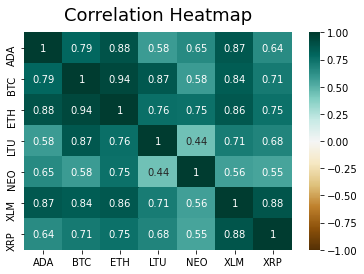

In [12]:
heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Conclusion

Correlation is a measure of the strength of a linear relationship between two quantitative variables.
The above calculated correlation coefficients ranges from -1 to 1. 1 refers to perfect positive correlation meaning the data almost replicates each other. 0 refers to no relationship between the two variables. And -1 refers to perfect negative correlation meaning one decreses as the other increses. Bitcoin and Ethereum has the highest correlation coefficient 0.94. Neo and Litecoin has the lowest correlation coefficient 0.44. 